# I am creating my own Linear Regression model

In [419]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
import matplotlib as plt
import seaborn as sns

In [420]:
from sklearn.datasets import load_boston
boston_data = load_boston()
values = boston_data.data
columnss = boston_data.feature_names
boston_df = pd.DataFrame(data= values, columns=columnss)

In [421]:
target = pd.DataFrame(boston_data.target)
target.set_axis(['price'], axis=1,inplace=True)

# Simple Linear regressions

In [422]:
#Average room per house as x data fpr linear regression.
X = boston_df['RM']
y = target

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [424]:
SkLr = LinearRegression()

In [425]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [426]:
SkLr.fit(X_train,y_train)

y_predict = SkLr.predict(X_test)

from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

print(SkLr.intercept_, SkLr.coef_)

[-32.55158437] [[8.74934434]]


### Creating My own LR Class

In [427]:
#making my own class

import numpy as np
import pandas as pd

class MyLr:
    
    def __init__(self):
        
        self.m = 0
        self.b = 0
        
    def train(self, X_train, y_train):
        
        numa = 0
        deno = 0
        
        for i in range(len(X_train)):
            deno = deno + (y_train.iloc[i,:].values[0] - y_train.mean().values[0])*(X_train.iloc[i,:].values[0] -
                                                                                    X_train.mean().values[0])
            
            numa = numa + (X_train.iloc[i,:].values[0] - X_train.mean().values[0])*(X_train.iloc[i,:].values[0] - 
                                                                                    X_train.mean().values[0])
            
        self.m = deno/numa
        
        self.b = y_train.mean().values[0] - self.m*X_train.mean().values[0]
        

        return print(f"model has been trained intercept = {self.b} and slope = {self.m} ")
        
    def predict(self, x_test:list)->list:
        

        x_test = pd.DataFrame(data= x_test)

        output = []
        
        for i in range(len(x_test)):
            
            res = self.m*x_test.iloc[i,:].values[0] + self.b
            
            output.append(res)
            
        return np.array([output]).reshape(len(output),1)

In [428]:
myobj = MyLr()

In [429]:
myobj.train(X_train, y_train)

model has been trained intercept = -32.5515843678096 and slope = 8.749344338735002 


In [430]:
print(f"Intercept and cofficent from sk learn model {SkLr.intercept_}  {SkLr.coef_}")
print(f"Intercept and cofficent from my own created model {myobj.b}  {myobj.m}")

Intercept and cofficent from sk learn model [-32.55158437]  [[8.74934434]]
Intercept and cofficent from my own created model -32.5515843678096  8.749344338735002


## See both the value is same.   Hurray I have made my own LR algorithm!

In [431]:
print(f"r_2 score of Scikit Learn model = {r2_score(y_test, SkLr.predict(X_test))}")
print(f"r_2 score of my own created model  = {r2_score(y_test, myobj.predict(X_test))}")

r_2 score of Scikit Learn model = 0.6335439948424493
r_2 score of my own created model  = 0.6335439948424488


## See both the value is same.   Hurray I have made my own LR algorithm!

# Multiple Linear Regressions.

### I can create my own MLR model but in sk learn it already available

In [432]:
X_train,X_test,y_train, y_test = train_test_split(boston_df, target, test_size=0.2, random_state=2)

In [433]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_predict = mlr.predict(X_test)
print(f" The r2 score is {r2_score(y_test, y_predict)}")

 The r2 score is 0.7789207451814428


# Ploynomial Linear Regressions.

#### Makung a polynomially related X and Y Data Point.

<AxesSubplot:>

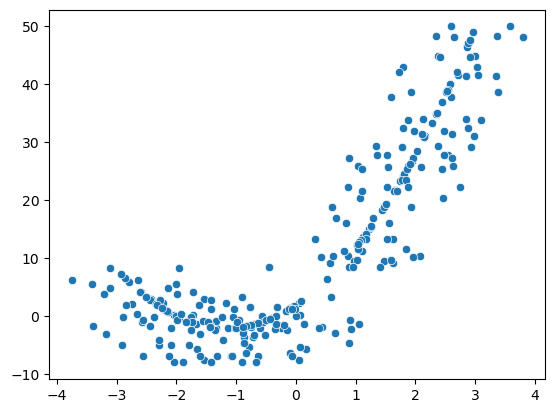

In [476]:


a = np.random.randint(2,10)
b = np.random.randint(2,10)
c = np.random.randint(2,10)

X = []
Y = []
for i in range(100):
    x = np.random.randint(-3,3) + np.random.random(1)
    x_noise1 = x[0] - np.random.random(1)[0]
    x_noise2 = x[0] + np.random.random(1)[0]
    
    
    X.append(x[0])
    X.append(x_noise1)
    X.append(x_noise2)
    
    y = a*x*x + b*x + c
    y_noise1 = y[0]+ np.random.randint(-6,5)
    y_noise2 = y[0]+ np.random.randint(-6,5)
    
    
    Y.append(y[0])
    Y.append(y_noise1)
    Y.append(y_noise1)
    
sns.scatterplot(X,Y)

# Ploynomyal Functions is created you can see in graph

In [477]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [478]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=25)

### We will use 1st linear regression then calculate the r2_score and then Polynomial Regressions then Calculate r_score then we compare

In [479]:
Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train)
y_predict = Linear_model.predict(X_test)
r2_score(y_test, y_predict)

0.6766514586288175

### Can see very low accuracy

### Now we will use polynomial linear regressions.

In [480]:
from sklearn.preprocessing import PolynomialFeatures

In [481]:
polynomial_object = PolynomialFeatures(degree=2)

X_train = polynomial_object.fit_transform(X_train)

X_test = polynomial_object.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [482]:
Lin_model = LinearRegression()

Lin_model.fit(X_train, y_train)

y_predict = Lin_model.predict(X_test)

r2_score(y_test, y_predict)

0.8513585489807223

In [ ]:
# See very good score